In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('sensor.csv')

df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [4]:
df.drop(['sensor_15','Unnamed: 0'],inplace = True,axis=1)

In [5]:
df.isnull().sum()

timestamp             0
sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39            27
sensor_40            27
sensor_41       

In [6]:
df = df.dropna()
df.isnull().sum()

timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0


In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

In [8]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [9]:
print(df[df.duplicated(keep=False)])

                     sensor_00  sensor_01  sensor_02  sensor_03  sensor_04   
timestamp                                                                    
2018-04-01 00:00:00   2.465394  47.092010  53.211800  46.310760   634.3750  \
2018-04-01 00:01:00   2.465394  47.092010  53.211800  46.310760   634.3750   
2018-04-01 01:00:00   2.453588  49.088540  53.124996  46.006943   626.6204   
2018-04-01 01:01:00   2.453588  49.088540  53.124996  46.006943   626.6204   
2018-04-01 02:00:00   2.441782  48.784720  52.994790  45.833332   629.9768   
...                        ...        ...        ...        ...        ...   
2018-07-09 10:01:00   2.466377  45.138890  51.215270  46.527775   640.1620   
2018-07-09 11:00:00   2.474248  45.138890  51.432289  46.701385   634.2593   
2018-07-09 11:01:00   2.474248  45.138890  51.432289  46.701385   634.2593   
2018-07-09 12:00:00   2.475232  45.008678  51.692710  46.484375   627.4305   
2018-07-09 12:01:00   2.475232  45.008678  51.692710  46.484375 

In [10]:
df = df.drop_duplicates()

In [11]:
print(df[df.duplicated(keep=False)])

Empty DataFrame
Columns: [sensor_00, sensor_01, sensor_02, sensor_03, sensor_04, sensor_05, sensor_06, sensor_07, sensor_08, sensor_09, sensor_10, sensor_11, sensor_12, sensor_13, sensor_14, sensor_16, sensor_17, sensor_18, sensor_19, sensor_20, sensor_21, sensor_22, sensor_23, sensor_24, sensor_25, sensor_26, sensor_27, sensor_28, sensor_29, sensor_30, sensor_31, sensor_32, sensor_33, sensor_34, sensor_35, sensor_36, sensor_37, sensor_38, sensor_39, sensor_40, sensor_41, sensor_42, sensor_43, sensor_44, sensor_45, sensor_46, sensor_47, sensor_48, sensor_49, sensor_50, sensor_51, machine_status]
Index: []

[0 rows x 52 columns]


In [12]:
df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [13]:
df_2 = df.drop('machine_status',axis=1)
col_names = df_2.columns

scaler=StandardScaler()
df_scaled= scaler.fit_transform(df_2)
df_scaled = pd.DataFrame(df_scaled,columns=col_names)

df_scaled.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,0.258758,-0.381967,0.564103,1.368501,0.236349,0.092415,0.116614,0.178273,0.248399,0.123496,...,-0.526605,-0.201872,-0.137921,2.382787,0.461340,-0.651711,0.680493,1.118847,0.877889,0.068840
1,0.212848,-0.270893,0.564103,1.413339,0.288737,-0.105708,0.064182,0.123933,0.278833,0.097287,...,-0.526605,-0.231182,-0.178505,2.353602,0.485929,-0.651711,0.644626,1.072393,0.844268,0.098757
2,0.247825,-0.381967,0.549107,1.413338,0.163812,0.128401,0.059815,0.245165,0.326654,0.140972,...,-0.557593,-0.319111,-0.219090,2.295231,0.485929,-0.651711,0.644626,1.049167,0.827460,0.091278
3,0.215035,-0.363456,0.564103,1.413338,0.260527,0.101202,0.081661,0.224263,0.326654,0.140972,...,-0.557593,-0.260491,-0.259674,2.324416,0.535107,-0.581871,0.685617,1.025941,0.861078,0.068840
4,0.232523,-0.381967,0.549107,1.413338,0.273960,0.209771,0.116614,0.199176,0.444034,0.189023,...,-0.588581,-0.113944,-0.259674,2.178491,0.535107,-0.581871,0.798339,1.025941,0.849872,0.072579


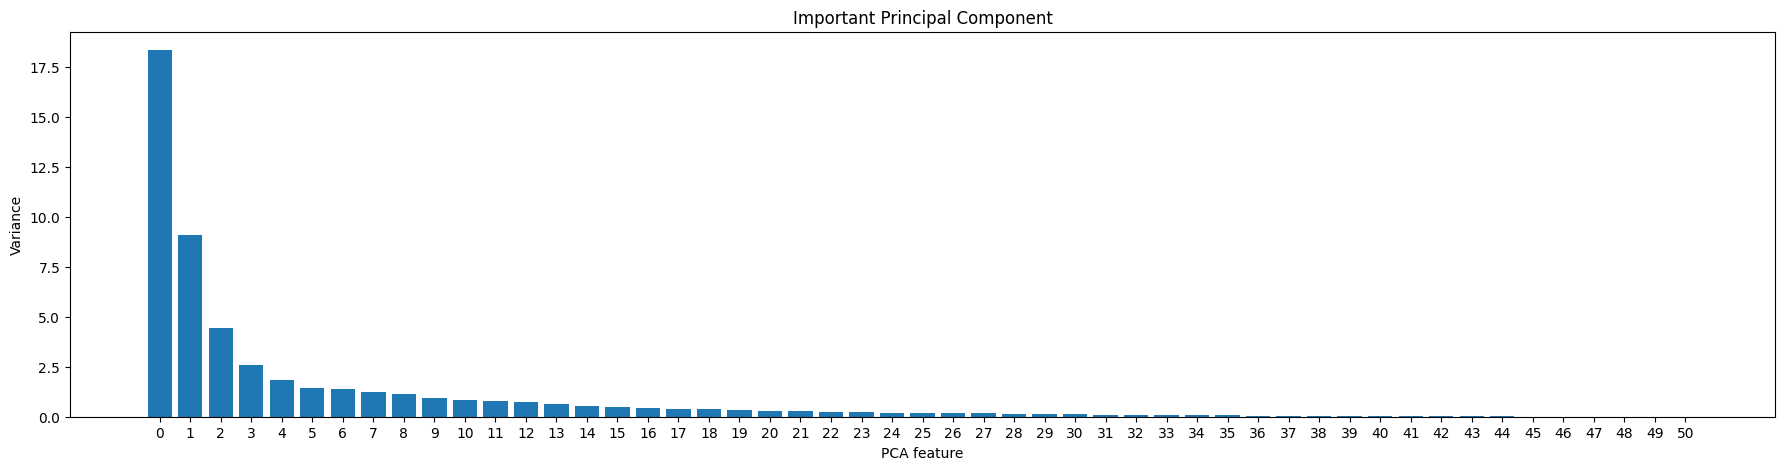

In [14]:
pca = PCA()
pca.fit(df_scaled)

features = range(pca.n_components_)
plt.figure(figsize=(22,5))
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title('Important Principal Component')
plt.show()

In [15]:
pca = PCA(n_components=2)
pComponents = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data = pComponents,columns=['pca1','pca2'])
principal_df.head()

,pca1,pca2
0,-0.726885,-1.476483
1,-0.856823,-1.499671
2,-0.855038,-1.603775
3,-0.781515,-1.702621
4,-0.715914,-1.771813


In [16]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(principal_df['pca1'])

print(result[1])


0.06814493962192016


In [17]:
pca1= principal_df['pca1'].pct_change()
autoco = pca1.dropna().autocorr()
print('Autocorrelation is:',autoco)

Autocorrelation is: -0.019280384095883018


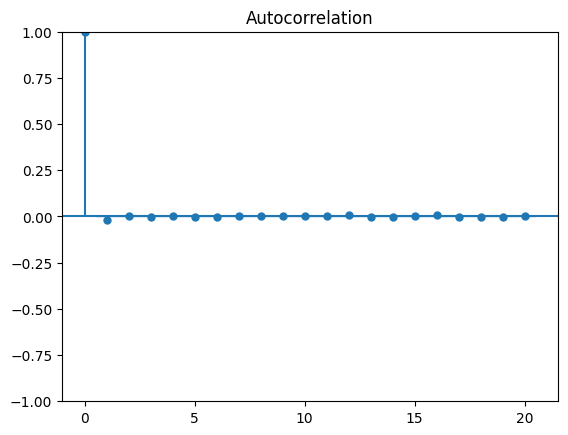

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(),lags=20,alpha=0.05)
plt.show()

# ISOLATION FOREST

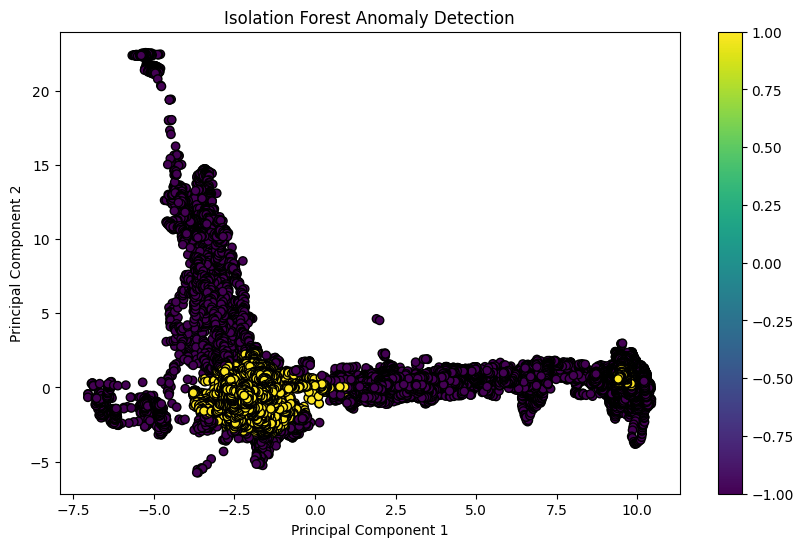

In [19]:
model_if =  IsolationForest(random_state=13)

model_if.fit(principal_df) 

principal_df['if_anomaly'] = pd.Series(model_if.predict(principal_df))

plt.figure(figsize=(10, 6))
plt.scatter(principal_df['pca1'], principal_df['pca2'], c=principal_df['if_anomaly'], cmap='viridis', marker='o', edgecolors='k')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [20]:
principal_df['if_anomaly'].value_counts()

if_anomaly
 1    94600
-1    23312
Name: count, dtype: int64

In [21]:
dfBroken = df[df["machine_status"]=="BROKEN"]

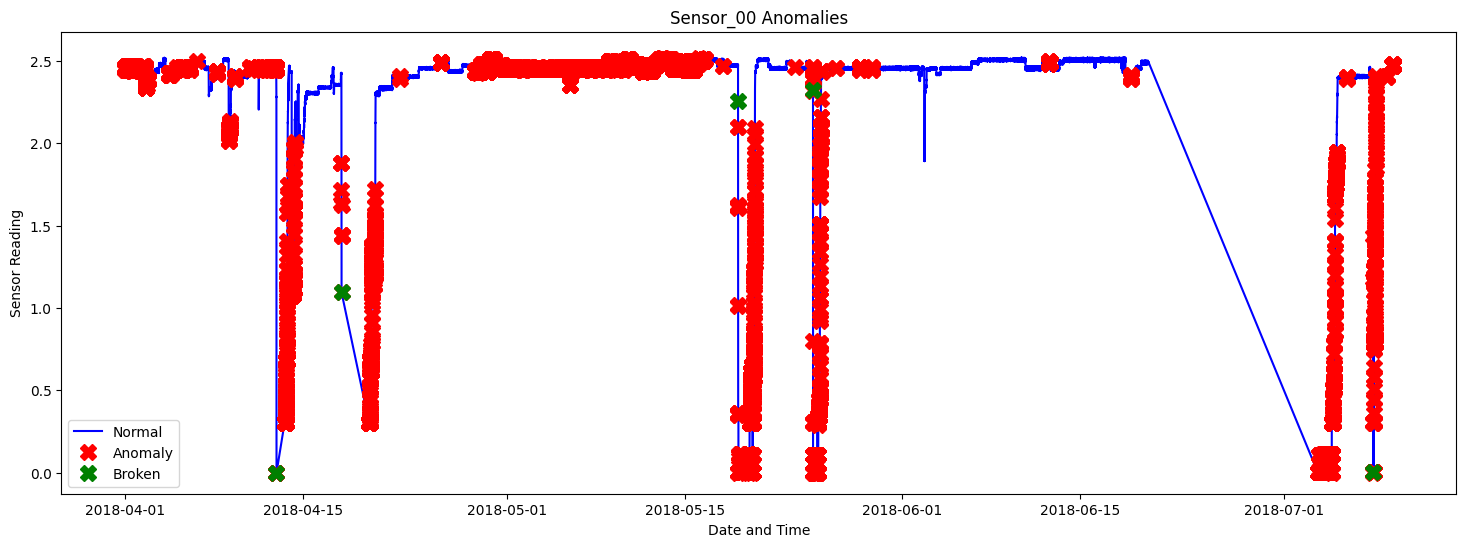

In [22]:
df['if_anomaly'] = pd.Series(principal_df['if_anomaly'].values, index=df.index)
a = df[df['if_anomaly'] == -1] 

plt.figure(figsize=(18,6))
plt.plot(df['sensor_00'], color='blue', label='Normal')
plt.plot(a['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_00 Anomalies')
plt.legend(loc='best')
plt.show()

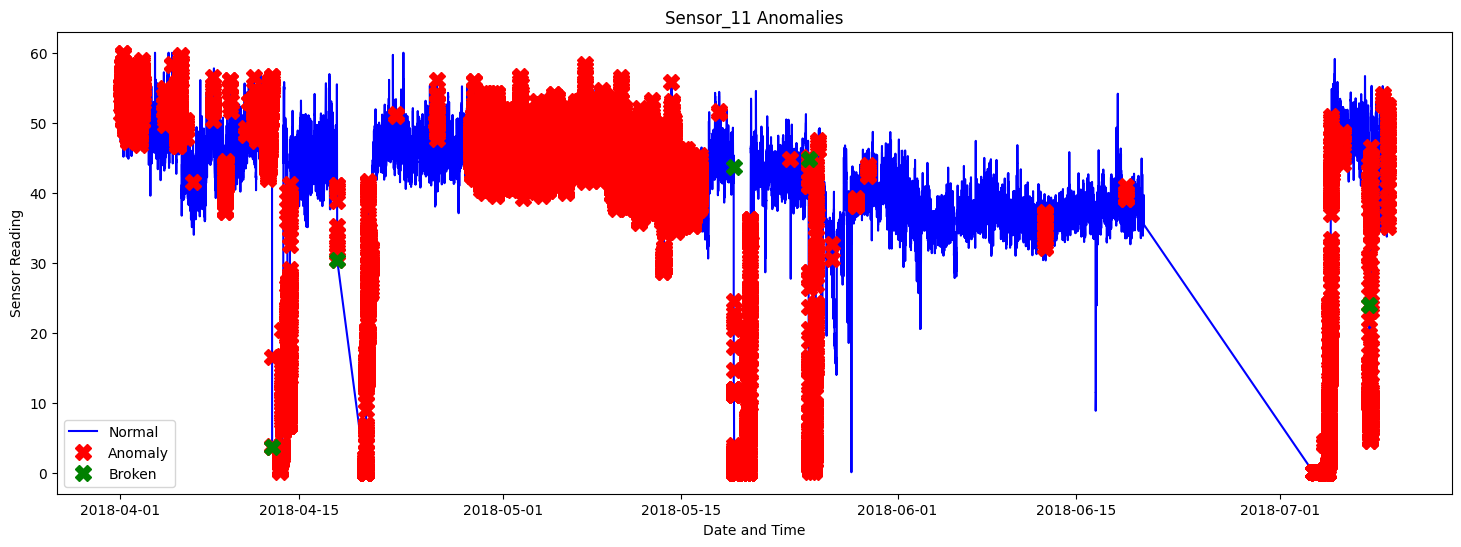

In [23]:
df['if_anomaly'] = pd.Series(principal_df['if_anomaly'].values, index=df.index)
a = df[df['if_anomaly'] == -1] #anomaly

plt.figure(figsize=(18,6))
plt.plot(df['sensor_11'], color='blue', label='Normal')
plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.plot(dfBroken['sensor_11'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_11 Anomalies')
plt.legend(loc='best')
plt.show()

# ONE CLASS SVM

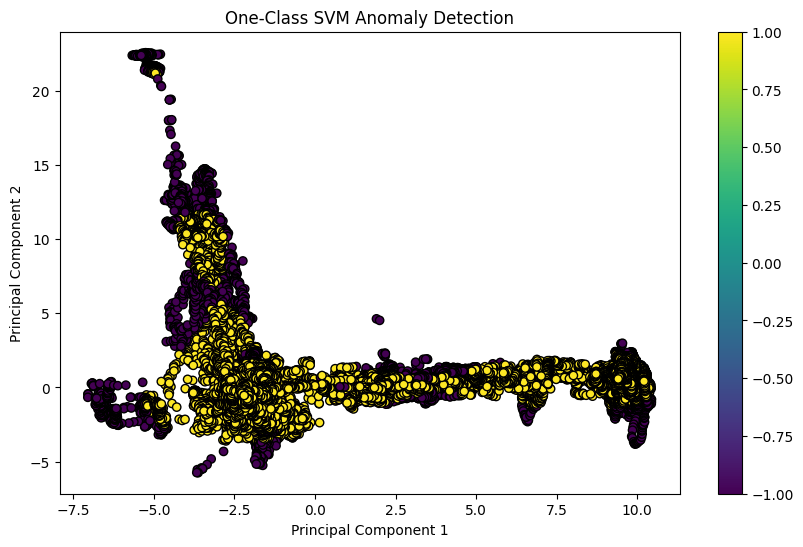

In [24]:
model_SVM = OneClassSVM(nu=0.05)

model_SVM.fit(principal_df) 

principal_df['svm_anomaly'] = pd.Series(model_SVM.predict(principal_df))

plt.figure(figsize=(10, 6))
plt.scatter(principal_df['pca1'], principal_df['pca2'], c=principal_df['svm_anomaly'], cmap='viridis', marker='o', edgecolors='k')
plt.title('One-Class SVM Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


In [25]:
principal_df['svm_anomaly'].value_counts()

svm_anomaly
 1    112021
-1      5891
Name: count, dtype: int64

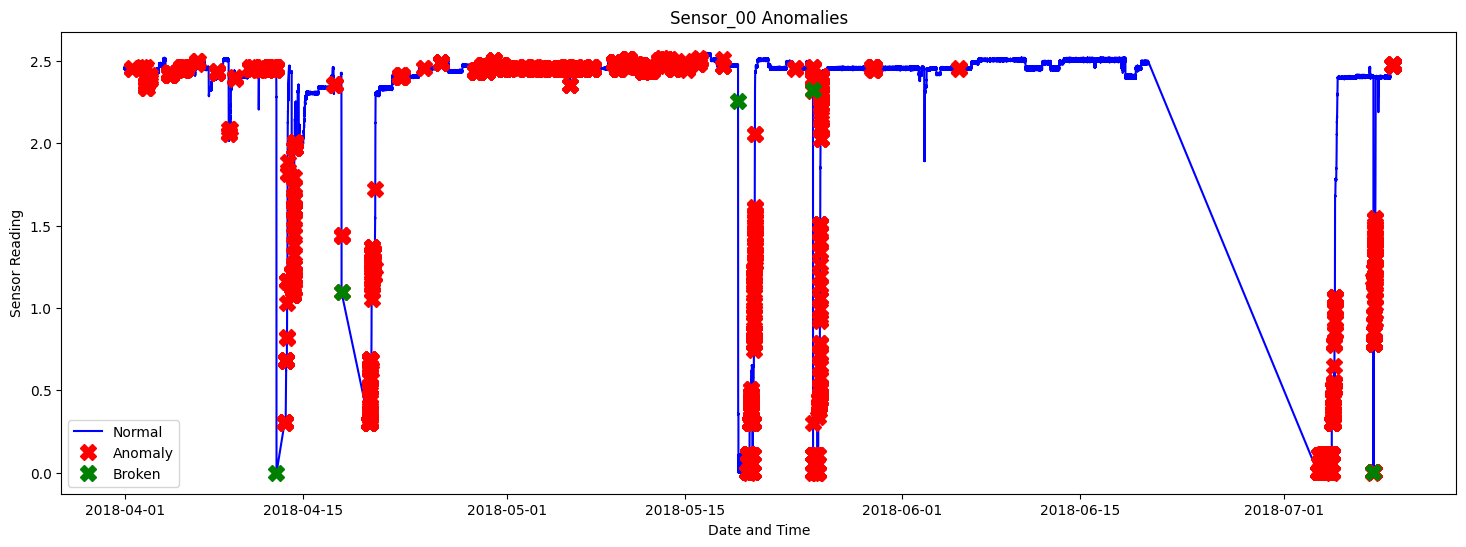

In [26]:
df['svm_anomaly'] = pd.Series(principal_df['svm_anomaly'].values, index=df.index)
a = df[df['svm_anomaly'] == -1] 

plt.figure(figsize=(18,6))
plt.plot(df['sensor_00'], color='blue', label='Normal')
plt.plot(a['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_00 Anomalies')
plt.legend(loc='best')
plt.show()

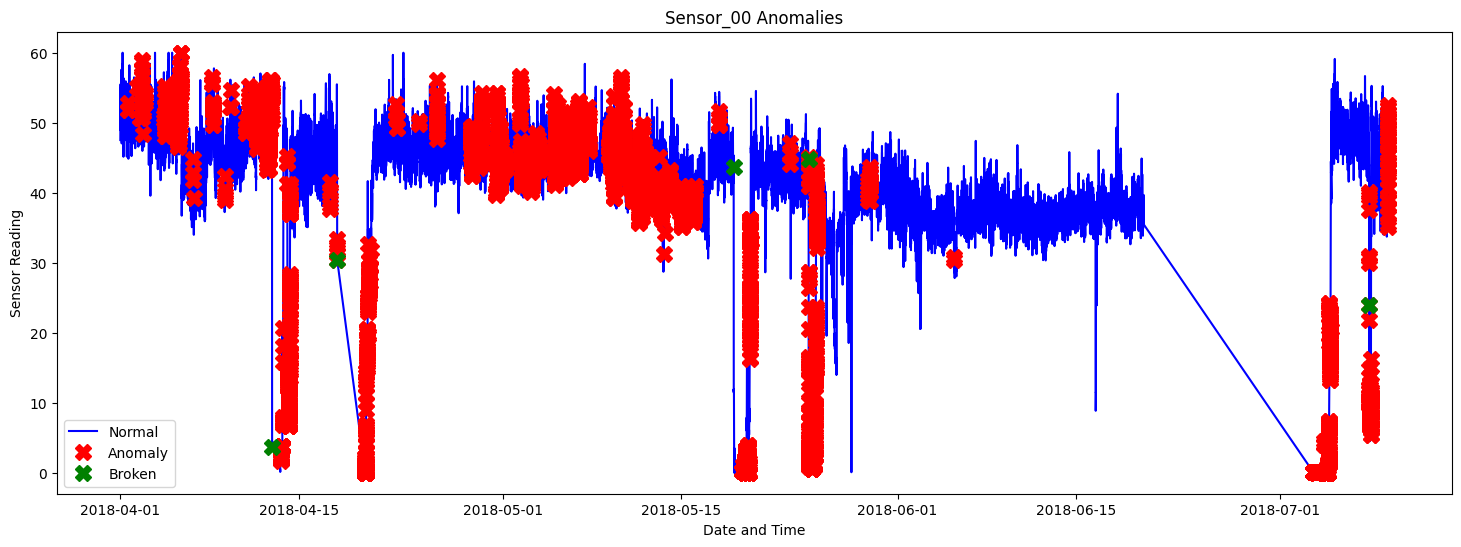

In [27]:
df['svm_anomaly'] = pd.Series(principal_df['svm_anomaly'].values, index=df.index)
a = df[df['svm_anomaly'] == -1] 

plt.figure(figsize=(18,6))
plt.plot(df['sensor_11'], color='blue', label='Normal')
plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.plot(dfBroken['sensor_11'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_00 Anomalies')
plt.legend(loc='best')
plt.show()

# Local Outlier Factor

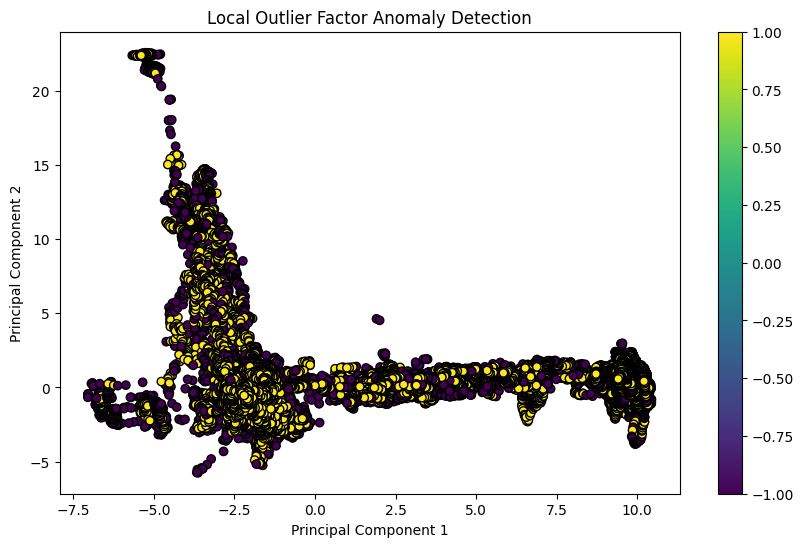

In [28]:
model_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred_lof = model_lof.fit_predict(principal_df)

principal_df['lof_anomaly'] = y_pred_lof

plt.figure(figsize=(10, 6))
plt.scatter(principal_df['pca1'], principal_df['pca2'], c=principal_df['lof_anomaly'], cmap='viridis', marker='o', edgecolors='k')
plt.title('Local Outlier Factor Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [29]:
principal_df['lof_anomaly'].value_counts()

lof_anomaly
 1    112016
-1      5896
Name: count, dtype: int64

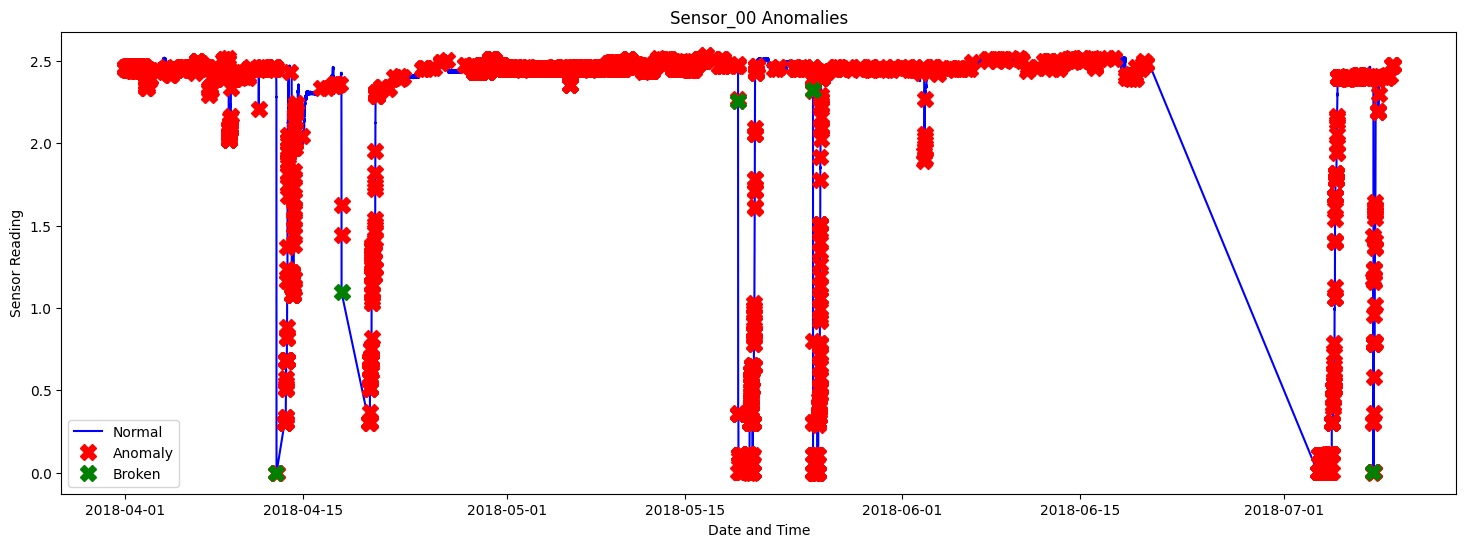

In [30]:
df['lof_anomaly'] = pd.Series(principal_df['lof_anomaly'].values, index=df.index)
a = df[df['lof_anomaly'] == -1] 

plt.figure(figsize=(18,6))
plt.plot(df['sensor_00'], color='blue', label='Normal')
plt.plot(a['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.plot(dfBroken['sensor_00'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_00 Anomalies')
plt.legend(loc='best')
plt.show()

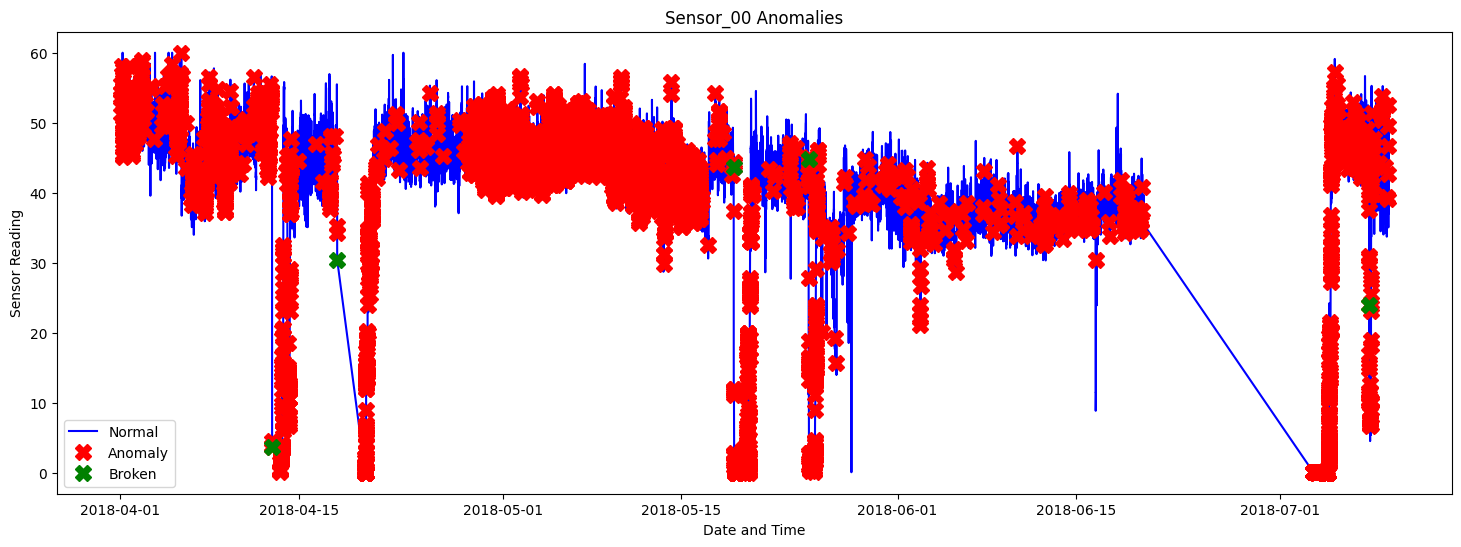

In [31]:
df['lof_anomaly'] = pd.Series(principal_df['lof_anomaly'].values, index=df.index)
a = df[df['lof_anomaly'] == -1] 

plt.figure(figsize=(18,6))
plt.plot(df['sensor_11'], color='blue', label='Normal')
plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.plot(dfBroken['sensor_11'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_00 Anomalies')
plt.legend(loc='best')
plt.show()

# Evaluation

In [32]:
predictions = df[['machine_status', 'if_anomaly', 'svm_anomaly', 'lof_anomaly']]

In [33]:
predictions.loc[predictions["if_anomaly"] == 1, "if_anomaly"] = 0
predictions.loc[predictions["if_anomaly"] == -1, "if_anomaly"] = 1

predictions.loc[predictions["svm_anomaly"] == 1, "svm_anomaly"] = 0
predictions.loc[predictions["svm_anomaly"] == -1, "svm_anomaly"] = 1

predictions.loc[predictions["lof_anomaly"] == 1, "lof_anomaly"] = 0
predictions.loc[predictions["lof_anomaly"] == -1, "lof_anomaly"] = 1

In [34]:
predictions["machine_status"] = predictions["machine_status"].map(
    {"NORMAL": 0, "RECOVERING": 1, "BROKEN": 1})

In [35]:
print("Classification Report for Isolation Forest:")
print(classification_report(predictions['machine_status'], predictions['if_anomaly']))

print("\nClassification Report for One-Class SVM:")
print(classification_report(predictions['machine_status'], predictions['svm_anomaly']))

print("\nClassification Report for Local Outlier Factor:")
print(classification_report(predictions['machine_status'], predictions['lof_anomaly']))

Classification Report for Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    114968
           1       0.13      1.00      0.22      2944

    accuracy                           0.83    117912
   macro avg       0.56      0.91      0.56    117912
weighted avg       0.98      0.83      0.89    117912


Classification Report for One-Class SVM:


              precision    recall  f1-score   support

           0       0.99      0.96      0.97    114968
           1       0.26      0.51      0.34      2944

    accuracy                           0.95    117912
   macro avg       0.62      0.74      0.66    117912
weighted avg       0.97      0.95      0.96    117912


Classification Report for Local Outlier Factor:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97    114968
           1       0.10      0.21      0.14      2944

    accuracy                           0.94    117912
   macro avg       0.54      0.58      0.55    117912
weighted avg       0.96      0.94      0.95    117912

